# Στοχαστική Ανάλυση Δεδομένων - Απαλλακτική Εργασία
Μάρκου Δήμητρα 
Π2019170

In [1]:
#Βιβλιοθήκες
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

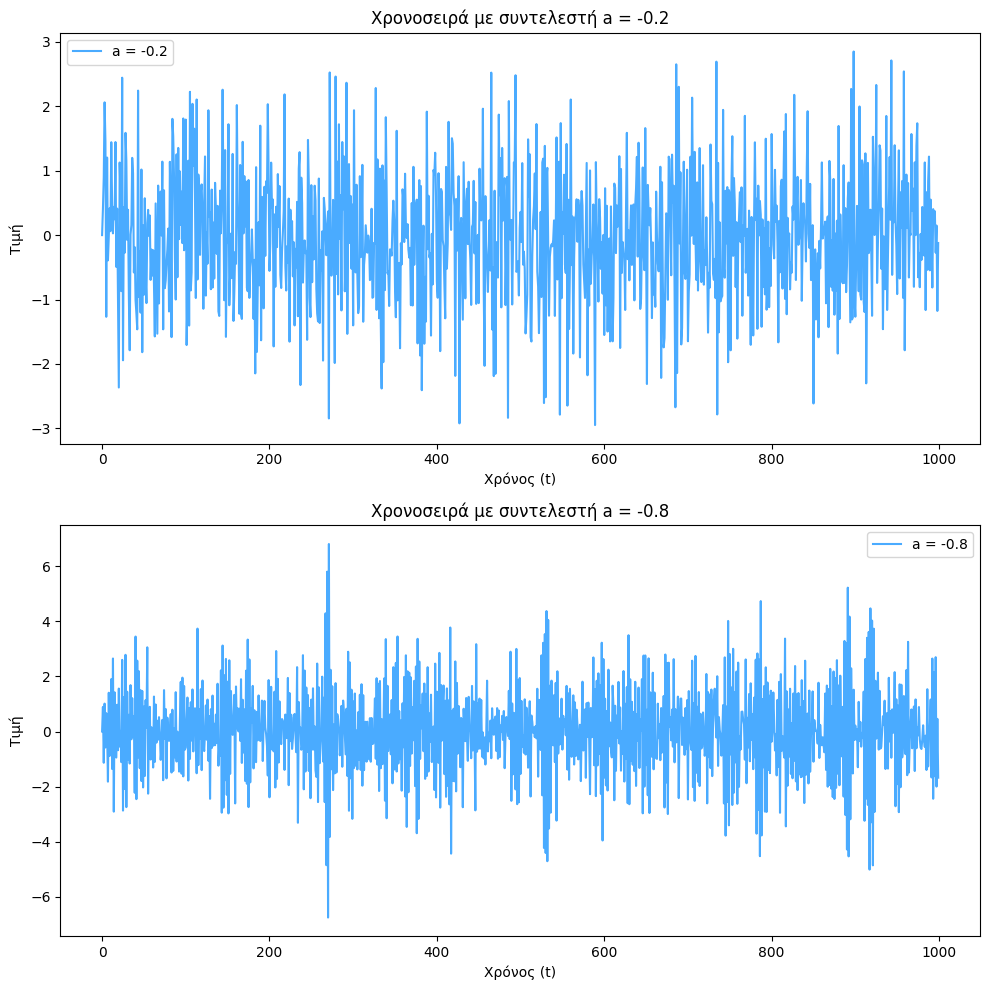

In [2]:
# Δημιουργία των χρονοσειρών 

# Παράμετροι
n = 1000  # Μήκος Χρονοσειράς
a1 = -0.2
a2 = -0.8
np.random.seed(0)

# Δημιουργία Λευκού Θορύβου
Zt1 = np.random.normal(0, 1, n)
Zt2 = np.random.normal(0, 1, n)

# Αρχικοποίηση Χρονοσειρών
X1 = np.zeros(n)
X2 = np.zeros(n)

for t in range(1, n):
    X1[t] = a1 * X1[t-1] + Zt1[t]
    X2[t] = a2 * X2[t-1] + Zt2[t]

# Γραφήματα Χρονοσειρών
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(X1, label=f'a = {a1}', color='#4AABFF')
plt.title('Χρονοσειρά με συντελεστή a = -0.2')
plt.xlabel('Χρόνος (t)')
plt.ylabel('Τιμή')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(X2, label=f'a = {a2}', color='#4AABFF')
plt.title('Χρονοσειρά με συντελεστή a = -0.8')
plt.xlabel('Χρόνος (t)')
plt.ylabel('Τιμή')
plt.legend()

plt.tight_layout()
plt.show()

# # Διαγραφή του αρχείου αν χρειαστεί
# import os
# os.remove("/kaggle/working/time_series.csv")

# Εξαγωγή σε csv αρχείο
time_series_df = pd.DataFrame({
    'Time (t)': range(n),
    'a = -0.2': X1,
    'a = -0.8': X2
})

time_series_df.to_csv('time-series.csv',index=False)

Για την χρονοσειρά με συντελεστή a = -0.2:
Μέση Τιμή (Mean): -0.039204407048413166
Διακύμανση (Variance): 1.0226585877909087
Τυπική Απόκλιση (Standard Deviation): 1.0112658343832786 

Για την χρονοσειρά με συντελεστή a = -0.8
Μέση Τιμή (Mean): 0.006509721478170432
Διακύμανση (Variance): 2.8934121695352677
Τυπική Απόκλιση (Standard Deviation): 1.7010032832229536


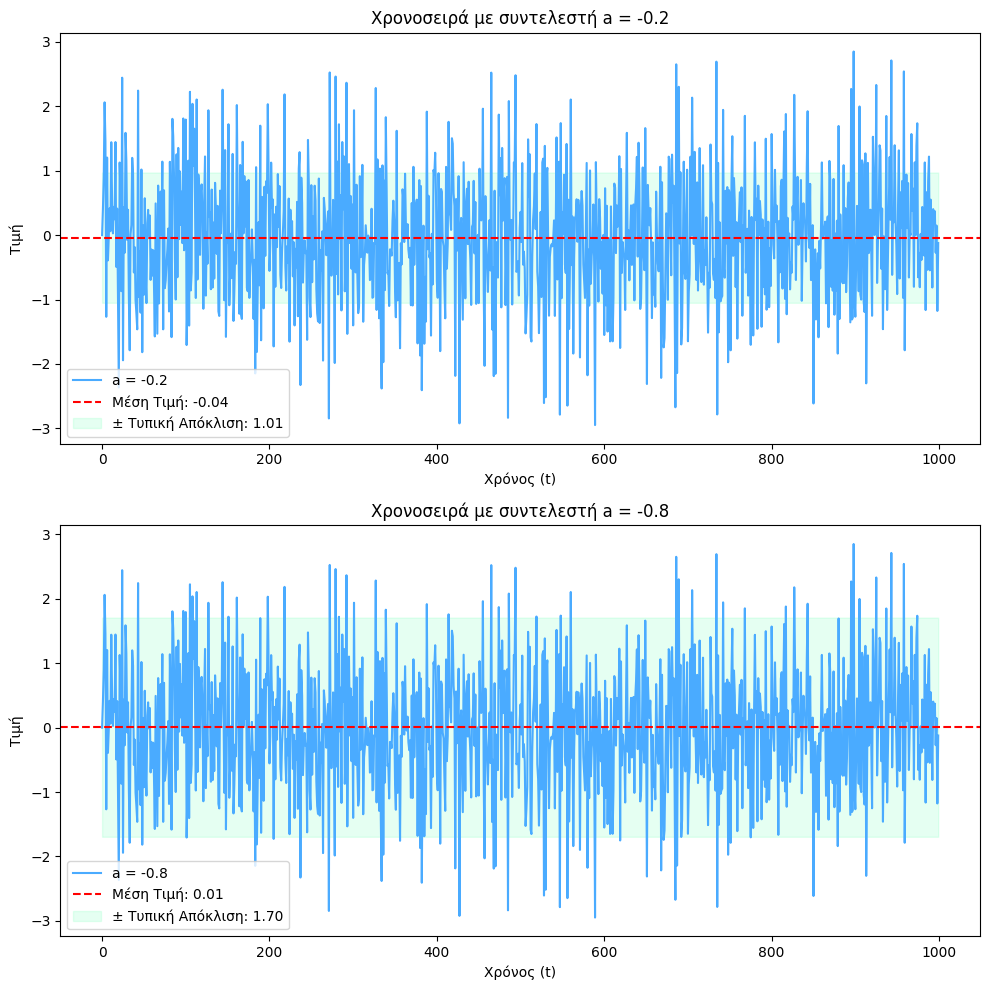

In [3]:
# Υπολογισμός Μέσης Τιμής, Διακύμανσης και Τυπικής Απόκλισης

mean_X1 = np.mean(X1)
variance_X1 = np.var(X1)
std_dev_X1 = np.std(X1)
print("Για την χρονοσειρά με συντελεστή a = -0.2:")
print("Μέση Τιμή (Mean):", mean_X1)
print("Διακύμανση (Variance):", variance_X1)
print("Τυπική Απόκλιση (Standard Deviation):", std_dev_X1, "\n")

mean_X2 = np.mean(X2)
variance_X2 = np.var(X2)
std_dev_X2 = np.std(X2)
print("Για την χρονοσειρά με συντελεστή a = -0.8")
print("Μέση Τιμή (Mean):", mean_X2)
print("Διακύμανση (Variance):", variance_X2)
print("Τυπική Απόκλιση (Standard Deviation):", std_dev_X2)

# Γραφήματα
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(X1, label=f'a = {a1}', color='#4AABFF')
plt.axhline(mean_X1, color='red', linestyle='--', label=f'Μέση Τιμή: {mean_X1:.2f}')
plt.fill_between(range(n), mean_X1 - std_dev_X1, mean_X1 + std_dev_X1, color='#00FF80', alpha=0.1, label=f'± Τυπική Απόκλιση: {std_dev_X1:.2f}')
plt.title('Χρονοσειρά με συντελεστή a = -0.2')
plt.xlabel('Χρόνος (t)')
plt.ylabel('Τιμή')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(X1, label=f'a = {a2}', color='#4AABFF')
plt.axhline(mean_X2, color='red', linestyle='--', label=f'Μέση Τιμή: {mean_X2:.2f}')
plt.fill_between(range(n), mean_X2 - std_dev_X2, mean_X2 + std_dev_X2, color='#00FF80', alpha=0.1, label=f'± Τυπική Απόκλιση: {std_dev_X2:.2f}')
plt.title('Χρονοσειρά με συντελεστή a = -0.8')
plt.xlabel('Χρόνος (t)')
plt.ylabel('Τιμή')
plt.legend()

plt.tight_layout()
plt.show()

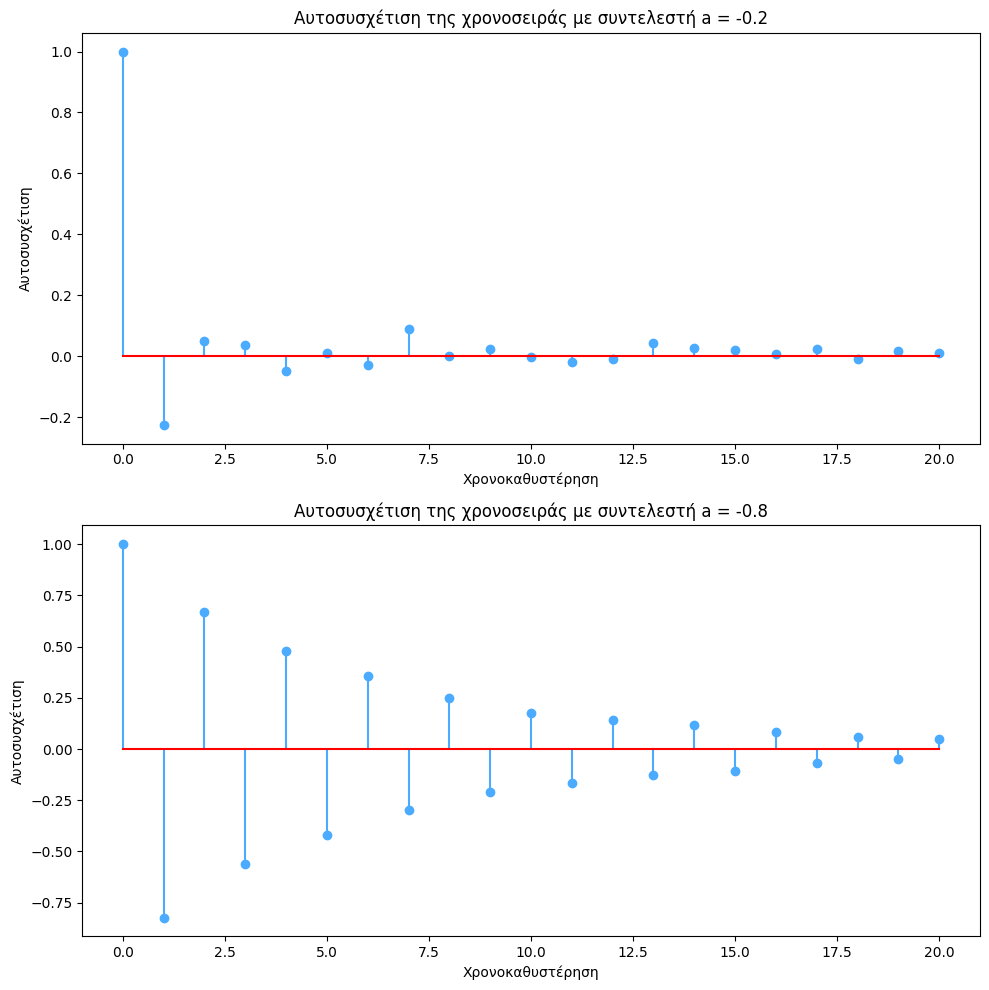

In [4]:
# Υπολογισμός αυτοσυχέτισης - autocorrelation
acf_X1 = sm.tsa.acf(X1, nlags=20)
acf_X2 = sm.tsa.acf(X2, nlags=20)

# Γράφηματα Αυτοσυσχέτισης

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.stem(range(len(acf_X1)), acf_X1, linefmt='#4AABFF', markerfmt='o', basefmt='red')
plt.title('Αυτοσυσχέτιση της χρονοσειράς με συντελεστή a = -0.2')
plt.xlabel('Χρονοκαθυστέρηση')
plt.ylabel('Αυτοσυσχέτιση')

plt.subplot(2, 1, 2)
plt.stem(range(len(acf_X2)), acf_X2, linefmt='#4AABFF', markerfmt='o', basefmt='red')
plt.title('Αυτοσυσχέτιση της χρονοσειράς με συντελεστή a = -0.8')
plt.xlabel('Χρονοκαθυστέρηση')
plt.ylabel('Αυτοσυσχέτιση')

plt.tight_layout()
plt.show()

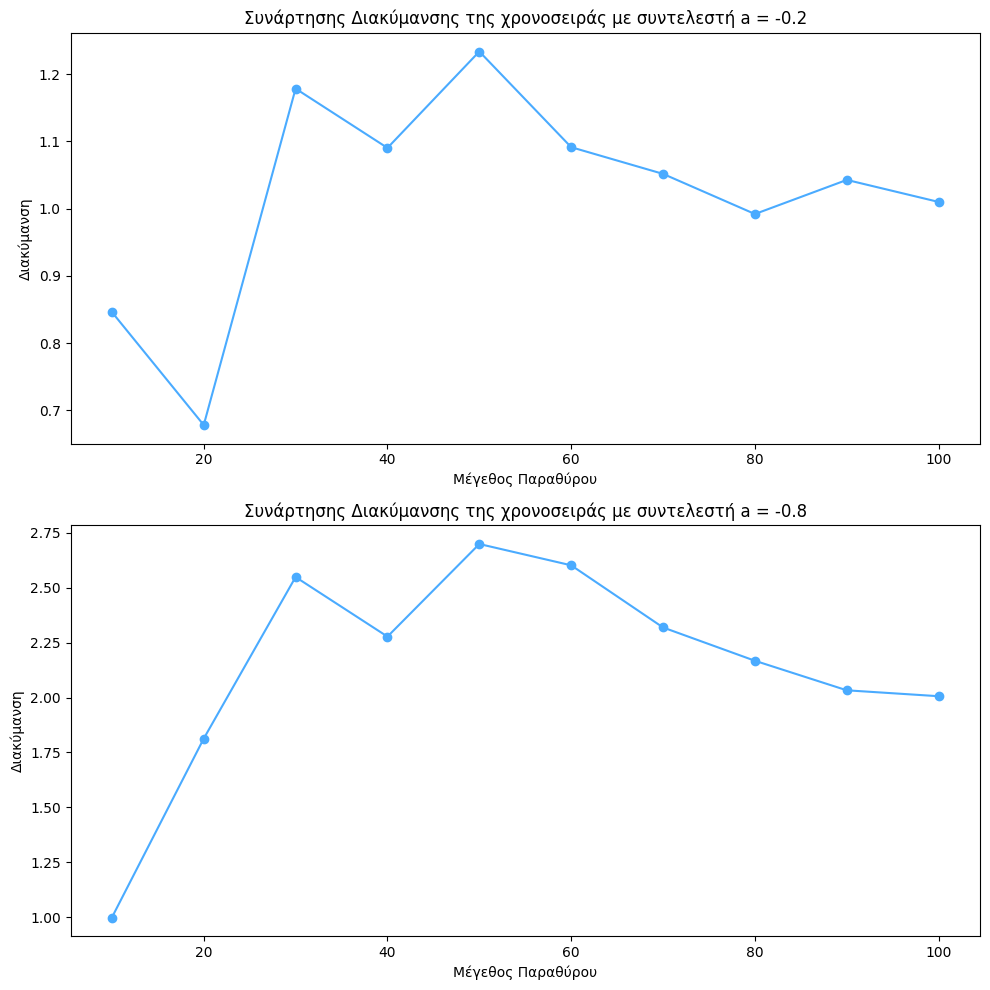

In [5]:
# Υπολογισμός Συνάρτησης Διακύμανσης
window_sizes = np.arange(10, 101, 10)
rolling_variance_X1 = [np.var(X1[:w]) for w in window_sizes]
rolling_variance_X2 = [np.var(X2[:w]) for w in window_sizes]

# Γραφήματα
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(window_sizes, rolling_variance_X1, 'o-', color='#4AABFF')
plt.title('Συνάρτησης Διακύμανσης της χρονοσειράς με συντελεστή a = -0.2')
plt.xlabel('Μέγεθος Παραθύρου')
plt.ylabel('Διακύμανση')

plt.subplot(2, 1, 2)
plt.plot(window_sizes, rolling_variance_X2, 'o-', color='#4AABFF')
plt.title('Συνάρτησης Διακύμανσης της χρονοσειράς με συντελεστή a = -0.8')
plt.xlabel('Μέγεθος Παραθύρου')
plt.ylabel('Διακύμανση')

plt.tight_layout()
plt.show()